## Plotting Stress Strain Curves

In this section, we'll use data from a tensile test to build a stress strain curve with Python and Matplotlib.

A tensile test is a type of mechanical test performed by engineers used to determine the mechanical properties of a material. Engineering metal alloys such as steel and aluminum alloys are tensile tested in order to determine their strength and stiffness. Tensile tests are performed in a piece of equipment called a mechanical test frame.

![instron](images/instron.jpg)

After a tensile test is complete, a set of data is produced by the mechanical test frame. Using the data acquired during a tensile test, a stress-strain curve can be produced.

In this post, we will create a stress-strain curve (a plot) from a set of tensile test data of a steel 1045 sample and an aluminum 6061 sample. The stress strain curve we construct will have the following features:

 * A descriptive title
 * Axes labels with units
 * Two lines on the same plot. One line for steel 1045 and one line for aluminum 6061
 * A legend


### Open a Jupyter notebook

We will construct our stress strain curve using a Jupyter notebook.

Make sure to save your Jupyter notebook with a recognizable name.

### Download the data and move the data into the same folder as the Jupyter notebook

Next, we need to download the two data files that we will use to build our stress-strain curve. You can download sample data using the links below:

[Al6061_raw_data.xls](https://github.com/ProfessorKazarinoff/Engineering-Materials-Programming/raw/main/Engineering-Materials-Programming-Book/07-Mechanical-Properties/Al60601_raw_data.xls)

[Steel1018_raw_data.xls](https://github.com/ProfessorKazarinoff/Engineering-Materials-Programming/raw/main/Engineering-Materials-Programming-Book/07-Mechanical-Properties/Steel1018_raw_data.xls)

After these .xls files are downloaded, both .xls files need to be moved into the same folder as your running Jupyter notebook.

### Import NumPy, Pandas, and Matplotlib

Now that a Jupyter notebook is open and the two .xls data files are in the same folder as the Jupyter notebook, we can start coding and build our plot.

At the top of the Jupyter notebook, import NumPy, Pandas and Matplotlib. The command ```%matplotlib inline``` is included so that our plot will display directly inside our Jupyter notebook. If you are using a .py file instead of a Jupyter notebook, make sure to comment out ```%matplotlib inline``` as this line is not valid Python code.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline

### Ensure the two .xls data files are in the same folder as the Jupyter notebook

Before we proceed, it's a good idea make sure the two .xls data files are in the same folder as our running Jupyter notebook.

We'll use a Jupyter notebook magic command to print out the contents of the folder that our notebook is in. The ```%ls``` command lists the contents of the current folder.

In [2]:
%ls

ABS_HIPS_plot_with_error_bars.png
Al60601_raw_data.xls
bar_plot_with_error_bars.ipynb
calculate-yield-strength-programmatically.ipynb
images/
mechanical-properties-from-stress-strain-curves.ipynb
mechanical-properties-intro.md
plotting-stress-strain-curves.ipynb
Steel1018_raw_data.xls
stress-strain_curve.png
stress_strain_curve_with_inset_elastic_region.ipynb
stress_strain_curve_with_inset.png


We can see the two .xls data files ```Al60601_raw_data.xls``` and ```Steel1018_raw_data.xls``` are in our current folder.

### Read the Excel files

Now that we are sure the two .xls data files are in the same folder as our notebook, we can import the data in the two two .xls files using Panda's ```pd.read_excel()``` function. The data from the two excel files will be stored in two Pandas dataframes called ```steel_df``` and ```al_df```. A Panda's dataframe is a tabular data type.

We can use Panda's ```.head()``` method to view the first five rows of each dataframe.

In [3]:
df_al = pd.read_excel('Al60601_raw_data.xls')
df_al.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,542,1,8.470,0.02256,201.146011,-0.001444,0.007552,NaN,NaN,NaN
1,542,2,8.632,0.02330,206.599442,0.000302,0.007552,NaN,NaN,NaN
2,542,3,10.027,0.02846,287.512573,0.003044,0.018898,NaN,NaN,NaN
3,542,4,11.031,0.03232,365.380981,0.009881,0.022061,NaN,NaN,NaN
4,542,5,11.928,0.03616,447.813965,0.014085,0.033652,NaN,NaN,NaN


In [4]:
df_steel = pd.read_excel('Steel1018_raw_data.xls')
df_steel.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,TESTNUM,POINTNUM,TIME,POSIT,FORCE,EXT,CH5,CH6,CH7,CH8
0,523,1,6.189,0.07302,202.924728,0.000402,-0.028272,NaN,NaN,NaN
1,523,2,6.549,0.07396,205.714890,-0.000238,-0.034549,NaN,NaN,NaN
2,523,3,7.148,0.07624,217.763336,-0.000713,-0.030140,NaN,NaN,NaN
3,523,4,9.146,0.08438,316.306122,0.002377,-0.025968,NaN,NaN,NaN
4,523,5,10.041,0.08822,417.003357,0.003089,-0.024100,NaN,NaN,NaN


We see a number of columns in each dataframe. The columns we are interested in are **FORCE**, **EXT**, and **CH5**. Below is a description of what these columns mean.

 * **FORCE** Force measurements from the load cell in pounds (lb), force in pounds
 * **EXT** Extension measurements from the mechanical extensometer in percent (%), strain in percent
 * **CH5** Extension readings from the laser extensometer in percent (%), strain in percent


### Create variables for stress and strain

Next we'll create a four Pandas series from the **CH5** and **FORCE** columns of our ```df_al``` and ```df_steel``` dataframes.

The equations below show how to calculate stress, σ, and strain, ϵ, from force _F_ and cross-sectional area _A_. Cross-sectional area _A_ is the formula for the area of a circle. For the steel and aluminum samples we tested, the diameter _d_ was 0.506 in.

$$
\sigma = \frac{F}{A_0}
$$

$$
F \ (kip) = F \ (lb) \times 0.001
$$

$$
A_0 = \pi (d/2)^2
$$

$$
d = 0.506 \ in
$$

$$
\epsilon \ (unitless) = \epsilon \ (\%) \times 0.01
$$

Remember that exponents in Python use a double asterix ```**```.

In [5]:
d = 0.506
r = d/2
A = np.pi*r**2

stress_al = (df_al['FORCE']/A)*0.001
strain_al = df_al['CH5']*0.01

stress_steel = (df_steel['FORCE']/A)*0.001
strain_steel = df_steel['CH5']*0.01

### Build a quick plot

Now that we have the data from the tensile test in four series, we can build a quick plot using Matplotlib's ```ax.plot()``` method. The first x,y pair we pass to ```ax.plot()``` is ```strain_al```,```stress_al``` and the second x,y pair we pass in is ```strain_steel```,```stress_steel```. The command ```plt.show()``` shows the plot.

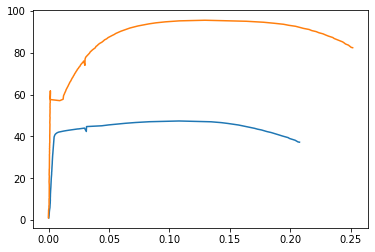

In [6]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al, strain_steel, stress_steel)

plt.show()

We see a plot with two lines. One line represents aluminum 6061 and one line represents steel 1018. We can improve our plot by adding axis labels with units, a title and a legend.

### Axis labels, title and a legend

Axis labels, titles and a legend are added to our plot with three Matplotlib methods. The methods are summarized in the table below.

| Matplotlib method | Description |	Example |
| --- | --- | --- |
| ax.set_xlabel() | 	x-axis label |	plt.xlabel('strain (in/in)') |
| ax.set_ylabel() | 	y-axis label |	plt.ylabel('stress (ksi)') |
| ax.set_title() | 	plot title |	plt.title('Stress Strain Curve') |
| ax.legend() |	legend |	plt.legend(['steel','aluminum']) |

The code cell below shows these four methods in action and produces a plot.

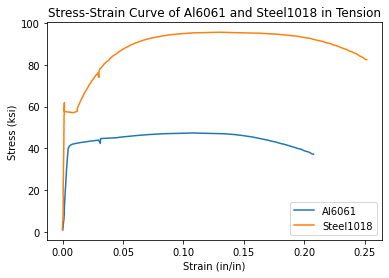

In [7]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)

ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of Al6061 and Steel1018 in Tension')
ax.legend(['Al6061','Steel1018'])

plt.show()

### Save the plot as a .png image

Now we can save the plot as a .png image using Matplotlib's ```plt.savefig()``` method. The code cell below builds the plot and saves an image file called stress-strain_curve.png. The argument ```dpi=300``` inside of Matplotlib's ```plt.savefig()``` method specifies the resolution of our saved image. The image ```stress-strain_curve.png``` will be saved in the same folder as our running Jupyter notebook.


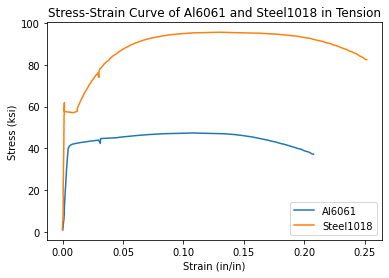

In [8]:
fig,ax = plt.subplots()

ax.plot(strain_al, stress_al)
ax.plot(strain_steel, stress_steel)

ax.set_xlabel('Strain (in/in)')
ax.set_ylabel('Stress (ksi)')
ax.set_title('Stress-Strain Curve of Al6061 and Steel1018 in Tension')
ax.legend(['Al6061','Steel1018'])

plt.savefig('stress-strain_curve.png', dpi=300)
plt.show()

Our complete stress strain curve contains two lines, one for steel and one for aluminum. The plot has axis labels with units, a title and a legend. A copy of the plot is now saved as ```stress-strain_curve.png``` in the same folder as our Jupyter notebook.